# MODELS

In [1]:
import pandas as pd
import numpy as np
import pickle
import yaml
import sys
import os
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import shap
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
with open("../params.yaml", "r") as file:
    config = yaml.safe_load(file)

sys.path.insert(0, os.path.abspath(config['src']))
import functions as fn

In [3]:
config['knn']

{'n_neighbors': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20],
 'p': [1, 2, 3],
 'weights': ['uniform', 'distance']}

In [4]:
X_train = pd.read_csv(config['data']['cleaned']+'X_train_transformed.csv')
X_test = pd.read_csv(config['data']['cleaned']+'X_test_transformed.csv')
y_train = pd.read_csv(config['data']['cleaned']+'y_train.csv')
y_test = pd.read_csv(config['data']['cleaned']+'y_test.csv')

## 1.Linear Model

In [5]:
lm = LinearRegression().fit(X_train, y_train)

y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

with open(config['models']+'LinearRegression.pkl', 'wb') as file:
    pickle.dump(lm, file)

**The coeficients:**

In [6]:
coef_list = list(zip(np.abs(lm.coef_[0]).tolist(),lm.coef_[0].tolist(),list(X_train.columns)))
coef_list.sort(reverse=True)
coef_list = [(item[2], round(item[1],2)) for item in coef_list]
pd.DataFrame(coef_list).rename(columns={0:"factor",1:'coefficient'})

,factor,coefficient
0,company_age,-36605.22
1,job_simpl_machine learning engineer,20651.03
2,job_simpl_data scientist,18999.93
3,zone_Western,16024.44
4,sector_Media and Entertaiment,-13457.20
5,job_simpl_data engineer,11790.51
6,machine_learning_yn,11742.89
7,spark_yn,10537.09
8,sector_Unknown,9203.66
9,excel_yn,-7160.26


**The intercept:**

In [7]:
print("The intercept is: {:.2f} ".format(lm.intercept_[0]))

The intercept is: 99640.17 


**The performance:**

In [8]:
y_train_performance_lm = np.array(y_train).reshape(-1,1)
y_test_performance_lm  = np.array(y_test).reshape(-1,1)

results, df1, df2 = fn.model_performance(y_train_performance_lm, y_pred_train_lm, y_test_performance_lm, y_pred_test_lm)
results

,Error_metric,Train,Test
0,Mean error,0.00,1858.38
1,Mean absolute error,20974.90,22207.49
2,Mean squared error,773962633.60,795725108.04
3,Root mean squared error,27820.18,28208.60
4,Mean absolute percentual error,22.13,23.13
5,R2,0.31,0.15


## 2.Key Nearest Neightbors (KNN)

### 2.1.Bayes Search of KNN

In [9]:
bayes_knn = BayesSearchCV(KNeighborsRegressor(),config['knn'],cv= config['cv'],n_jobs= config['n_jobs'],
                           random_state = config['random_state'],verbose= config['verbose']).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [15]:
knn_bayes = bayes_knn.best_estimator_
knn_bayes

KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')

In [16]:
with open(config['models']+'top_model_KNN_with_bayes.pkl', 'wb') as file:
    pickle.dump(knn_bayes, file)

### Testing performance of  KNN with Bayes Search

In [11]:
y_pred_train_knn_bayes = knn_bayes.predict(X_train)
y_pred_test_knn_bayes = knn_bayes.predict(X_test)

In [12]:
y_train_performance_knn_bayes = np.array(y_train).reshape(-1,1)
y_test_performance_knn_bayes  = np.array(y_test).reshape(-1,1)

results_knn_bayes, df1_knn_bayes, df2_knn_bayes = fn.model_performance(y_train_performance_knn_bayes, y_pred_train_knn_bayes, 
                                                     y_test_performance_knn_bayes, y_pred_test_knn_bayes)
results_knn_bayes

,Error_metric,Train,Test
0,Mean error,0.00,2458.72
1,Mean absolute error,0.00,23191.35
2,Mean squared error,0.00,839995477.09
3,Root mean squared error,0.00,28982.68
4,Mean absolute percentual error,0.00,24.32
5,R2,1.00,0.11


### 2.2.Grid Search of KNN

In [13]:
grid_knn = GridSearchCV(KNeighborsRegressor(),config['knn'],cv= config['cv'],n_jobs= config['n_jobs'],
                           verbose= config['verbose']).fit(X_train, y_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits


In [18]:
knn_grid = grid_knn.best_estimator_
knn_grid

KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')

In [19]:
with open(config['models']+'top_model_KNN_with_grid.pkl', 'wb') as file:
    pickle.dump(knn_grid, file)

### Testing performance of  KNN with Grid Search

In [20]:
y_pred_train_knn_grid = knn_grid.predict(X_train)
y_pred_test_knn_grid = knn_grid.predict(X_test)

In [21]:
y_train_performance_knn_grid = np.array(y_train).reshape(-1,1)
y_test_performance_knn_grid  = np.array(y_test).reshape(-1,1)

results_knn_grid, df1_knn_grid, df2_knn_grid = fn.model_performance(y_train_performance_knn_grid, y_pred_train_knn_grid, 
                                                     y_test_performance_knn_grid, y_pred_test_knn_grid)
results_knn_bayes

,Error_metric,Train,Test
0,Mean error,0.00,2458.72
1,Mean absolute error,0.00,23191.35
2,Mean squared error,0.00,839995477.09
3,Root mean squared error,0.00,28982.68
4,Mean absolute percentual error,0.00,24.32
5,R2,1.00,0.11


### 2.3.Selecting KNN model with the elbow strategy

In [22]:
knn_models = {}
weights = ["uniform","distance"]
p_values = [1,2,3]
scores = {}
for k in range(2,20):
    for weight in weights:
        for value in p_values:
            model_knn = KNeighborsRegressor(n_neighbors=k,weights=weight,p=value).fit(X_train, y_train)
            print("Training the K-NN model with {} neighbours with weights {} and p set to {}...".format(k,weight,value))
            knn_models[str(k)+"_"+weight+"_"+str(value)] = model_knn
            scores[str(k)+"_"+weight+"_"+str(value)] = model_knn.score(X_test, y_test)
            print()

Training the K-NN model with 2 neighbours with weights uniform and p set to 1...

Training the K-NN model with 2 neighbours with weights uniform and p set to 2...

Training the K-NN model with 2 neighbours with weights uniform and p set to 3...

Training the K-NN model with 2 neighbours with weights distance and p set to 1...

Training the K-NN model with 2 neighbours with weights distance and p set to 2...

Training the K-NN model with 2 neighbours with weights distance and p set to 3...

Training the K-NN model with 3 neighbours with weights uniform and p set to 1...

Training the K-NN model with 3 neighbours with weights uniform and p set to 2...

Training the K-NN model with 3 neighbours with weights uniform and p set to 3...

Training the K-NN model with 3 neighbours with weights distance and p set to 1...

Training the K-NN model with 3 neighbours with weights distance and p set to 2...

Training the K-NN model with 3 neighbours with weights distance and p set to 3...

Training t


Training the K-NN model with 19 neighbours with weights uniform and p set to 3...

Training the K-NN model with 19 neighbours with weights distance and p set to 1...

Training the K-NN model with 19 neighbours with weights distance and p set to 2...

Training the K-NN model with 19 neighbours with weights distance and p set to 3...



In [23]:
knn_scores = {}

for key in knn_models.keys():
    knn_scores[key] = knn_models[key].score(X_test, y_test)

knn_scores

{'2_uniform_1': -0.39601304834602047,
 '2_uniform_2': -0.39601304834602047,
 '2_uniform_3': -0.39601304834602047,
 '2_distance_1': -0.3927509683588326,
 '2_distance_2': -0.39239080962115547,
 '2_distance_3': -0.39372433012096875,
 '3_uniform_1': -0.16665212712564137,
 '3_uniform_2': -0.1683867771514438,
 '3_uniform_3': -0.16665212712564137,
 '3_distance_1': -0.18740986224777134,
 '3_distance_2': -0.1768506016958138,
 '3_distance_3': -0.17221544354018392,
 '4_uniform_1': -0.08394414900234004,
 '4_uniform_2': -0.08603452067181117,
 '4_uniform_3': -0.08603452067181117,
 '4_distance_1': -0.09166090912437164,
 '4_distance_2': -0.08236235983981177,
 '4_distance_3': -0.07973239196453963,
 '5_uniform_1': -0.06594931500960022,
 '5_uniform_2': -0.06554412839846124,
 '5_uniform_3': -0.06594931500960022,
 '5_distance_1': -0.05519525288754634,
 '5_distance_2': -0.04789881962037246,
 '5_distance_3': -0.04740453645512899,
 '6_uniform_1': -0.0035159130391018145,
 '6_uniform_2': -0.004290995217350213,


In [24]:
values = []
for key in list(scores.keys()):
    values.append((scores[key], int(key.split("_")[0]), key.split("_")[1], key.split("_")[2]))

knn_models_df = pd.DataFrame(values, columns=["score","K","weight","p"])
knn_models_df

,score,K,weight,p
0,-0.40,2,uniform,1
1,-0.40,2,uniform,2
2,-0.40,2,uniform,3
3,-0.39,2,distance,1
4,-0.39,2,distance,2
...,...,...,...,...
103,0.10,19,uniform,2
104,0.10,19,uniform,3
105,0.11,19,distance,1
106,0.12,19,distance,2


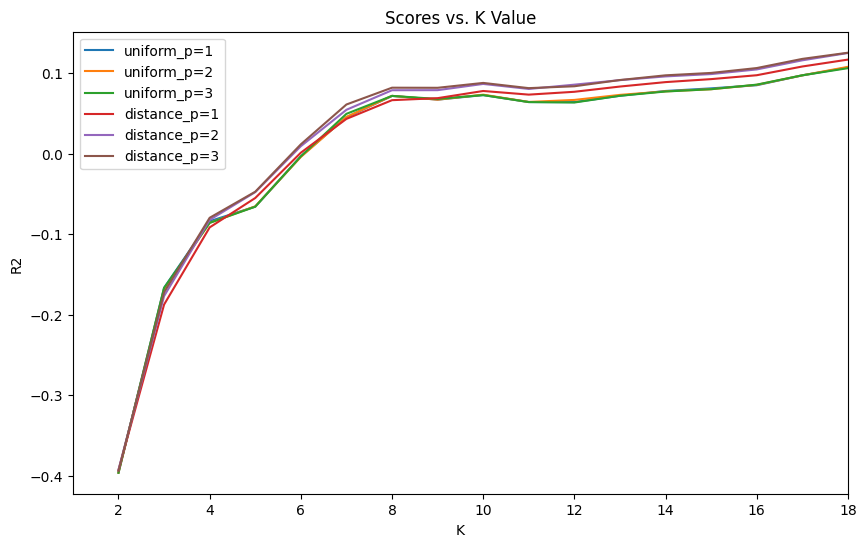

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="uniform") &
                                (knn_models_df['p']=="1")],  x="K",y="score",markers="x",label="uniform_p=1" ,ax = ax)

sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="uniform") & 
                                (knn_models_df['p']=="2") ], x="K",y="score",markers="o", label="uniform_p=2" ,ax = ax)

sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="uniform") & 
                                (knn_models_df['p']=="3") ], x="K",y="score",markers="o", label="uniform_p=3",ax = ax)

sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="distance") & 
                                (knn_models_df['p']=="1")],  x="K",y="score", markers="x", label="distance_p=1" ,ax = ax)

sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="distance") & 
                                (knn_models_df['p']=="2") ], x="K",y="score",markers="o", label="distance_p=2",ax = ax)

sns.lineplot(data=knn_models_df[(knn_models_df['weight']=="distance") & 
                                (knn_models_df['p']=="3") ], x="K",y="score",markers="o", label="distance_p=3",ax = ax)
plt.title('Scores vs. K Value')
plt.legend()
plt.ylabel('R2')
plt.xlim([1,18])
plt.savefig(config['images']+'elbow_transp.png', dpi=300, transparent=True)
plt.savefig(config['images']+'elbow.png', dpi=300)
plt.show()

In [26]:
top_knn_4 = KNeighborsRegressor(n_neighbors=4, weights = "distance", p=2).fit(X_train, y_train)

top_knn_4_score = top_knn_4.score(X_test, y_test)

print("The score for the K-NN model with 4 neighbours, weighted by distance is {:.3f}".format(top_knn_4_score))

The score for the K-NN model with 4 neighbours, weighted by distance is -0.082


In [27]:
top_knn_4 = KNeighborsRegressor(n_neighbors=8, weights = "distance", p=2).fit(X_train, y_train)

top_knn_4_score = top_knn_4.score(X_test, y_test)

print("The score for the K-NN model with 8 neighbours, weighted by distance is {:.3f}".format(top_knn_4_score))

The score for the K-NN model with 8 neighbours, weighted by distance is 0.078


**Despite the huge overfitting the best model for KNN has 17 neighbors**

## 3.Random Forest Regressor

### 3.1.Bayes Search of Random Forest

In [31]:
bayes_forest = BayesSearchCV(RandomForestRegressor(),config['random_forest'],cv = config['cv'], verbose = config['verbose'],
                             n_jobs=config['n_jobs'],random_state=config['random_state']).fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


In [32]:
top_bayes_forest = bayes_forest.best_estimator_
top_bayes_forest

RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=150)

In [33]:
with open(config['models']+'top_model_random_forest_with_bayes.pkl', 'wb') as file:
    pickle.dump(top_bayes_forest, file)

### Testing performance of Random Forest

In [34]:
y_pred_train_bayes_forest = top_bayes_forest.predict(X_train)
y_pred_test_bayes_forest = top_bayes_forest.predict(X_test)

In [35]:
y_train_performance_bayes_forest = np.array(y_train).reshape(-1,1)
y_test_performance_bayes_forest  = np.array(y_test).reshape(-1,1)

results_bayes_forest, df1_bayes_forest, df2_bayes_forest = fn.model_performance(y_train_performance_bayes_forest,
                                                                                y_pred_train_bayes_forest, 
                                                                                y_test_performance_bayes_forest, 
                                                                                y_pred_test_bayes_forest)
results_bayes_forest

,Error_metric,Train,Test
0,Mean error,-8.37,564.05
1,Mean absolute error,11633.68,21947.09
2,Mean squared error,248939496.58,787866716.53
3,Root mean squared error,15777.82,28068.96
4,Mean absolute percentual error,35.16,30.70
5,R2,0.78,0.16


### 3.2.Grid Search of Random Forest

In [36]:
grid_forest = GridSearchCV(RandomForestRegressor(),config['random_forest'],
                           cv = config['cv'], verbose = config['verbose'],
                           n_jobs=config['n_jobs']).fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


In [37]:
top_grid_forest = grid_forest.best_estimator_
top_grid_forest

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      n_estimators=150)

In [38]:
with open(config['models']+'top_model_random_forest_with_grid.pkl', 'wb') as file:
    pickle.dump(top_grid_forest, file)

### Testing performance of Grid Search of Random Forest

In [39]:
y_pred_train_grid_forest = top_grid_forest.predict(X_train)
y_pred_test_grid_forest = top_grid_forest.predict(X_test)

In [40]:
y_train_performance_grid_forest = np.array(y_train).reshape(-1,1)
y_test_performance_grid_forest  = np.array(y_test).reshape(-1,1)

results_grid_forest, df1_grid_forest, df2_grid_forest = fn.model_performance(y_train_performance_grid_forest,
                                                                                y_pred_train_grid_forest, 
                                                                                y_test_performance_grid_forest, 
                                                                                y_pred_test_grid_forest)
results_grid_forest

,Error_metric,Train,Test
0,Mean error,-170.32,414.50
1,Mean absolute error,11168.90,21918.43
2,Mean squared error,229410568.20,776902620.88
3,Root mean squared error,15146.31,27872.97
4,Mean absolute percentual error,35.37,30.72
5,R2,0.80,0.17


## 4.Gradient Boosting Regressor

### 4.1.Bayes Search of Gradient Boosting

In [41]:
bayes_gradient = BayesSearchCV(GradientBoostingRegressor(),config['gradient_boosting'],
        cv = config['cv'], verbose = config['verbose'],n_jobs=config['n_jobs'],
                               random_state=config['random_state']).fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

In [42]:
top_bayes_gradient = bayes_gradient.best_estimator_
top_bayes_gradient

GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='auto', min_samples_leaf=2,
                          min_samples_split=10)

In [43]:
with open(config['models']+'top_model_gradient_boosting_with_bayes.pkl', 'wb') as file:
    pickle.dump(top_grid_forest, file)

### Testing performance of Gradient Boosting

In [44]:
y_pred_train_bayes_gradient = top_bayes_gradient.predict(X_train)
y_pred_test_bayes_gradient = top_bayes_gradient.predict(X_test)

In [45]:
y_train_performance_bayes_gradient = np.array(y_train).reshape(-1,1)
y_test_performance_bayes_gradient  = np.array(y_test).reshape(-1,1)

results_bayes_gradient, df1_bayes_gradient, df2_bayes_gradient = fn.model_performance(y_train_performance_bayes_gradient, 
                                                                                      y_pred_train_bayes_gradient, 
                                                                                      y_test_performance_bayes_gradient, 
                                                                                      y_pred_test_bayes_gradient)
results_bayes_gradient

,Error_metric,Train,Test
0,Mean error,628.03,2400.89
1,Mean absolute error,14954.93,23243.00
2,Mean squared error,410619191.55,842466785.04
3,Root mean squared error,20263.74,29025.28
4,Mean absolute percentual error,34.33,30.45
5,R2,0.63,0.11


### 4.2.Grid Search of Gradient Boosting

In [46]:
grid_gradient = GridSearchCV(GradientBoostingRegressor(),config['gradient_boosting'],
                           cv = config['cv'], verbose = config['verbose'],
                           n_jobs=config['n_jobs']).fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

In [47]:
top_grid_gradient = grid_gradient.best_estimator_
top_grid_gradient

GradientBoostingRegressor(criterion='squared_error', loss='absolute_error',
                          max_depth=5, max_features='auto', min_samples_leaf=5,
                          min_samples_split=10)

In [48]:
with open(config['models']+'top_model_gradient_boosting_with_grid.pkl', 'wb') as file:
    pickle.dump(top_grid_forest, file)

### Testing performance of Gradient Boosting with Grid Search

In [49]:
y_pred_train_grid_gradient = top_grid_gradient.predict(X_train)
y_pred_test_grid_gradient = top_grid_gradient.predict(X_test)

In [50]:
y_train_performance_grid_gradient = np.array(y_train).reshape(-1,1)
y_test_performance_grid_gradient  = np.array(y_test).reshape(-1,1)

results_grid_gradient, df1_grid_gradient, df2_grid_gradient = fn.model_performance(y_train_performance_grid_gradient, 
                                                                                   y_pred_train_grid_gradient, 
                                                                                   y_test_performance_grid_gradient, 
                                                                                   y_pred_test_grid_gradient)
results_grid_gradient

,Error_metric,Train,Test
0,Mean error,2244.51,3633.73
1,Mean absolute error,12242.79,22016.10
2,Mean squared error,403478175.41,806711130.85
3,Root mean squared error,20086.77,28402.66
4,Mean absolute percentual error,33.70,29.32
5,R2,0.64,0.14


**The best model has been obtained through GridSearchCV and is: RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,n_estimators=150)**

## To use SHAP for the best model

In [52]:
# Fits the explainer
explainer = shap.Explainer(top_grid_forest.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 219it [01:48,  1.93it/s]                                                                        


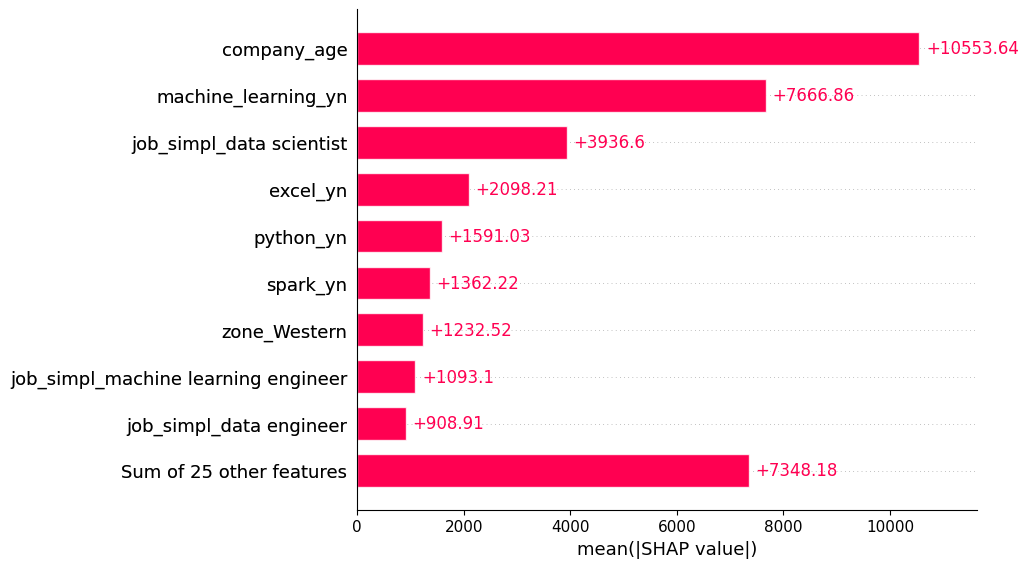

In [65]:
shap.plots.bar(shap_values, show=False)
plt.savefig(config['images']+'shap_bar_transp.png', dpi=300, transparent=True)
plt.savefig(config['images']+'shap_bar.png', dpi=300)
plt.show()

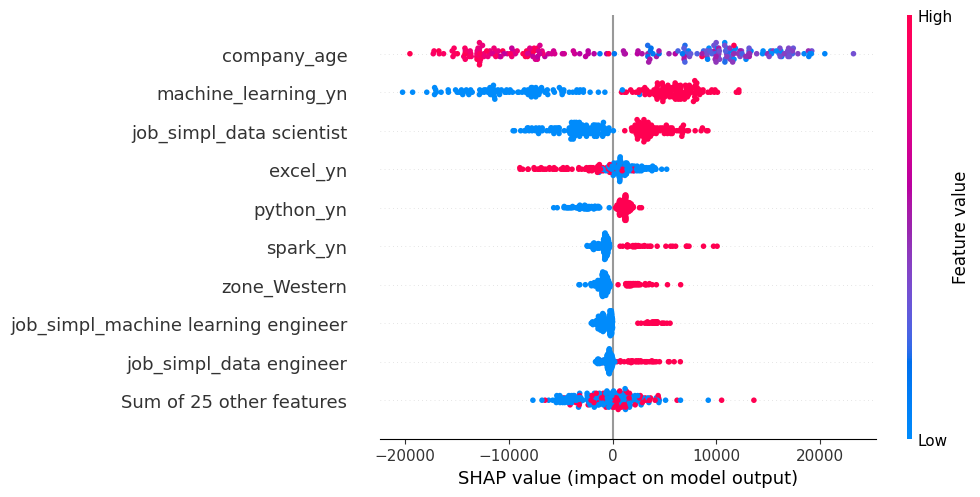

In [66]:
shap.plots.beeswarm(shap_values, show=False)
plt.savefig(config['images']+'shap_bee_transp.png', dpi=300, transparent=True)
plt.savefig(config['images']+'shap_bee.png', dpi=300)
plt.show()